# ML Course 1 - Practice (subject)

## Import libraries

Better to do it before any further work.

In [306]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

## Original data set

<center> <img src="titanic.png" width=400/> </center>


*On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.*

You can have a quick view on the original data set, but keep in mind that you will not have to work on this exact version today.

In [307]:
dataset = pd.read_csv('Titanic.csv')

In [308]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Surname,Fsize,Family,FsizeD,Deck,Child,Mother
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,2,Braund_2,small,NaN,Adult,Not Mother
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,2,Cumings_2,small,C,Adult,Not Mother
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,1,Heikkinen_1,singleton,NaN,Adult,Not Mother
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,2,Futrelle_2,small,C,Adult,Not Mother
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,1,Allen_1,singleton,NaN,Adult,Not Mother


## Simplified data set

To start will a more simple date set, we provide a simplified version of the Titanic data set with only the following variables:

| Variable | Definition | Key |
|---|---|---|
| Embarked | Port of Embarkation | 0 = Cherbourg, 1 = Queenstown, 2 = Southampton |
| Pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| Fare | Passenger fare |  |
| Sex | Sex | 0 = male, 1 = female |
| Age | Age in years |  |
| Survived | Survival | 0 = No, 1 = Yes |

In [309]:
dataset = pd.read_csv('titanic_simplified.csv')

In [310]:
dataset.head()

,Embarked,Pclass,Fare,Sex,Age,Survived
0,2,3,7.2500,0,22.0,0
1,0,1,71.2833,1,38.0,1
2,2,3,7.9250,1,26.0,1
3,2,1,53.1000,1,35.0,1
4,2,3,8.0500,0,35.0,0


Your mission is to explore the data set and extract some information to answer this open question:
**“what sorts of people were more likely to survive?”**

Here are some computations to do on the data set (you are free to make extra tests and exploration on your own):
* General information:
 * Number of passengers
 * Mean age of the passengers
 * Number of passengers above 70 years old
 * Proportion of each class of passenger
 * Age distribution of the passengers depending on the port of embarkment (density plots)
 * Fare vs. age (scatter plot)
* Information linked to survival:
 * Age distribution of the passengers who survided/did not survive (histogram)
 * Repartition of survivals among men and women (stacked bars)
 * Repartition of survivals for each class (stacked bars)
 
How do you interpret the results of your exploration?

**_Note:_ Your graphs should formatted so they are easily readable. It is expected that you provide a title and axis labels, as well as a legend when necessary.** 

<span style="color:Orange">**General Information**</span>

In [311]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Embarked  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Fare      891 non-null    float64
 3   Sex       891 non-null    int64  
 4   Age       891 non-null    float64
 5   Survived  891 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


,Embarked,Pclass,Fare,Sex,Age,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,1.531987,2.308642,32.204208,0.352413,29.789192,0.383838
std,0.794531,0.836071,49.693429,0.477990,14.384534,0.486592
min,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000
25%,1.000000,2.000000,7.910400,0.000000,21.000000,0.000000
50%,2.000000,3.000000,14.454200,0.000000,28.000000,0.000000
75%,2.000000,3.000000,31.000000,1.000000,38.000000,1.000000
max,2.000000,3.000000,512.329200,1.000000,80.000000,1.000000


<span style="color:Orange">**Number of Passengers**<span>

In [312]:
len(dataset.index)

891

<span style="color:Orange">**Mean age of passengers**<span>

In [313]:
dataset['Age'].mean()

29.789191919191918

<span style="color:Orange">**Number of passengers who are older than 70**<span>

In [314]:
dataset['Age'][dataset['Age'] > 70].count()
# dataset.Age[dataset.Age > 70].count() # Same as above

8

<span style="color:Orange">**Proportion of each class of passengers**<span>

In [315]:
for i in range(len(dataset['Pclass'].unique())):
    print(f'{i+1}st Class Proportion: ', (dataset['Pclass'] == i+1).sum() / len(dataset))

1st Class Proportion:  0.24242424242424243
2st Class Proportion:  0.20650953984287318
3st Class Proportion:  0.5510662177328844


<span style="color:Orange">**Age distribution of the passengers depending on the port of embarkment (density plots)**<span>

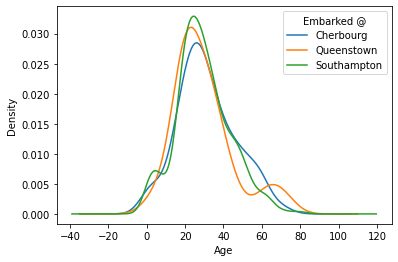

In [322]:
dataset['Age'].groupby(dataset['Embarked']).plot(kind='density')
# Below line also gives the same result but no clue why there are some Age values under 0
# dataset.groupby(['Embarked'])['Age'].plot(kind='density')

plt.xlabel('Age')
plt.legend(['Cherbourg', 'Queenstown','Southampton'], title='Embarked @')
plt.show()

<span style="color:Orange">**Fare vs. Age (Scatter)**<span>

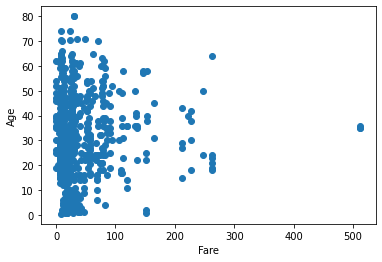

In [317]:
plt.scatter(dataset['Fare'], dataset['Age'])
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()

<span style="color:Orange">**Information linked to survival**<span>

In [318]:
dataset['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

<span style="color:Orange">**Age distribution of the passengers who survided/did not survive (histogram)**<span>

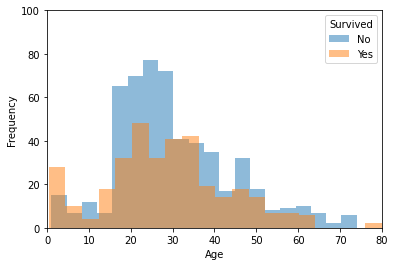

In [319]:
(dataset['Age'].groupby(dataset['Survived'])).plot(kind='hist', bins=20, alpha=0.5)

plt.xlabel('Age')
plt.xlim(0,80)
plt.ylim(0,100)
plt.legend(['No', 'Yes'], title='Survived', )
plt.show()

<span style="color:Orange">**Repartition of survivals among men and women (stacked bars)**<span>


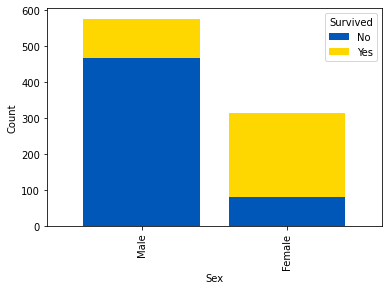

In [320]:
dataset.groupby(['Sex', 'Survived']).size().unstack().plot(kind='bar', stacked=True, color=['#0057b7', '#ffd700'], width=0.8)

plt.ylabel('Count')
plt.xticks((0, 1), ('Male', 'Female'))
plt.legend(['No', 'Yes'], title='Survived')
plt.show()

<span style="color:Orange">**Repartition of survivals for each class stacked bars**<span>


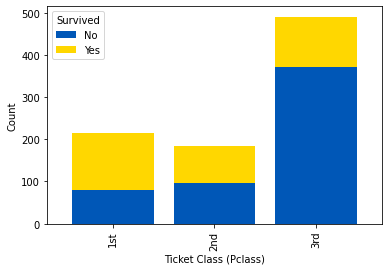

In [321]:
dataset.groupby(['Pclass', 'Survived']).size().unstack().plot(kind='bar', stacked=True, color=['#0057b7', '#ffd700'], width=0.8)

plt.ylabel('Count')
plt.xticks((0, 1, 2), ('1st', '2nd', '3rd'))
plt.xlabel('Ticket Class (Pclass)')
plt.legend(['No', 'Yes'], title='Survived')
plt.show()